In [26]:
from sklearn.utils import Bunch
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Dense,Conv1D,Flatten,MaxPooling1D,Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sn
from keras.layers.normalization import BatchNormalization
from keras.layers import Activation

data = pd.read_csv('skindata.txt',sep=',')
print(data)

#Verinin bağımlı-bağımsız değişkenlerini x-y'ye atadık
x=data.iloc[:,[0,1,2]].values
y=data.iloc[:, 3].values
#her satırdan 1 boyutlu vektör oluşturduk
x=x.reshape(x.shape[0],x.shape[1],1)

#verileri test-train olarak bölüyoruz
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.50,random_state=0)

#Model ekleme
model=Sequential()
model.add(Conv1D(200, 2, activation='relu',input_shape=(3,1)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dense(400,activation="relu"))
model.add(MaxPooling1D())
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(250,activation='relu'))
model.compile(loss ='sparse_categorical_crossentropy', optimizer="Adam", metrics=['accuracy'])
model.summary()

history=model.fit(x_train,y_train,batch_size=16,epochs=20,verbose=0,validation_split=0.1)

          b    r    g  cls
0        74   85  123    1
1        73   84  122    1
2        72   83  121    1
3        70   81  119    1
4        70   81  119    1
...     ...  ...  ...  ...
245052  163  162  112    2
245053  163  162  112    2
245054  163  162  112    2
245055  163  162  112    2
245056  255  255  255    2

[245057 rows x 4 columns]
Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_9 (Conv1D)            (None, 2, 200)            600       
_________________________________________________________________
batch_normalization_9 (Batch (None, 2, 200)            800       
_________________________________________________________________
activation_9 (Activation)    (None, 2, 200)            0         
_________________________________________________________________
dense_17 (Dense)             (None, 2, 400)            80400     
_________________________________

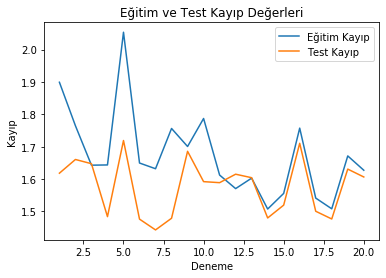

122528/122528 [==============================] - 5s 45us/step
Loss: 1.566363227238198 Accuracy: 0.716317892074585


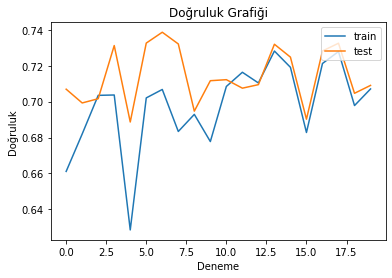

In [29]:
import matplotlib.pyplot as plt
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(loss)+1)
plt.plot(epochs,loss,label='Eğitim Kayıp')
plt.plot(epochs,val_loss,label='Test Kayıp')
plt.title('Eğitim ve Test Kayıp Değerleri')
plt.xlabel('Deneme')
plt.ylabel('Kayıp')
plt.legend()
plt.show()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Doğruluk Grafiği')
plt.ylabel('Doğruluk')
plt.xlabel('Deneme')
plt.legend(['train','test'], loc='upper right')
plt.show
acc=model.evaluate(x_train,y_train)
print("Loss:",acc[0],"Accuracy:",acc[1])
#pred= model.predict(x_test)
#pred_y=pred.argmax(axis=-1)
#cm=confusion_matrix(y_test,pred_y)
#sn.heatmap(cm,annot=True)

In [22]:
#plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_accuracy'])
#plt.title('Model Accuracy')
#plt.ylabel('Accuracy')
#plt.xlabel('Epoch')
#plt.legend['Train','Test'],loc='upper left'
#plt.show()

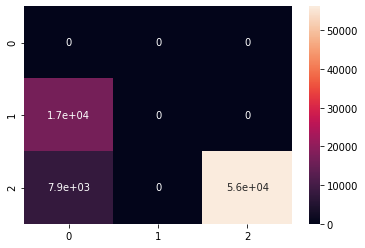

In [13]:
pred= model.predict(x_test)
pred_y=pred.argmax(axis=-1)
cm=confusion_matrix(y_test,pred_y)
sn.heatmap(cm,annot=True)